# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question #1

For this question use the data [at this link](https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set).

1. Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.
2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.
3. Plot the results for step #1 and #2.
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?


In [13]:
from xmltodict import parse
from urllib.request import urlopen

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import pandas as pd
import json
import yaml

import numpy as np

In [14]:
data_jan = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv')
data_jan  # 2021 january dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2021-01-11 11:00:00,2,RAY,KABATAŞ-MAHMUTBEY,2,AKTARMA,541,545
1,2021-01-18 06:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,1834,1867
2,2021-01-01 17:00:00,1,KARAYOLU,İETT,2,NORMAL,7406,7868
3,2021-01-18 20:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,7064,7199
4,2021-01-22 05:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,712,713
...,...,...,...,...,...,...,...,...
22122,2021-01-19 21:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,1445,1447
22123,2021-01-15 22:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,122,123
22124,2021-01-08 15:00:00,2,RAY,AKSARAY-HAVALİMANI,2,AKTARMA,3641,3720
22125,2021-01-08 10:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,7380,7857


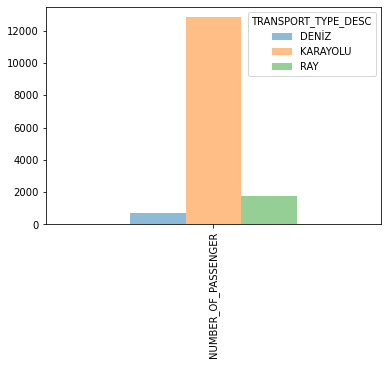

In [99]:
df_pivot = pd.pivot_table(data_jan, values="NUMBER_OF_PASSENGER",columns="TRANSPORT_TYPE_DESC")
ax = df_pivot.plot(kind="bar",alpha=0.5)
plt.show()

In [30]:
data_may = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv")
data_may # 2021 may dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2021-05-01 14:00:00,2.0,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,88,88
1,2021-05-03 16:00:00,2.0,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,5311,5356
2,2021-05-01 06:00:00,2.0,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,129,129
3,2021-05-03 12:00:00,2.0,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,2574,2641
4,2021-05-03 07:00:00,2.0,RAY,TAKSİM-4.LEVENT,2,AKTARMA,1038,1038
...,...,...,...,...,...,...,...,...
1785,2021-05-02 15:00:00,3.0,DENİZ,MOTOR TEKNE,2,NORMAL,134,134
1786,2021-05-03 09:00:00,2.0,RAY,İETT TÜNEL,2,AKTARMA,29,29
1787,2021-05-02 09:00:00,3.0,DENİZ,MOTOR TEKNE,2,NORMAL,109,111
1788,2021-05-02 23:00:00,2.0,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,2,2


# date sort function and changing in dataframe

In [35]:
def dateSort(data_month):
    return data_month.sort_values(by=["DATE_TIME"],inplace=True)
dateSort(data_jan)
dateSort(data_may)

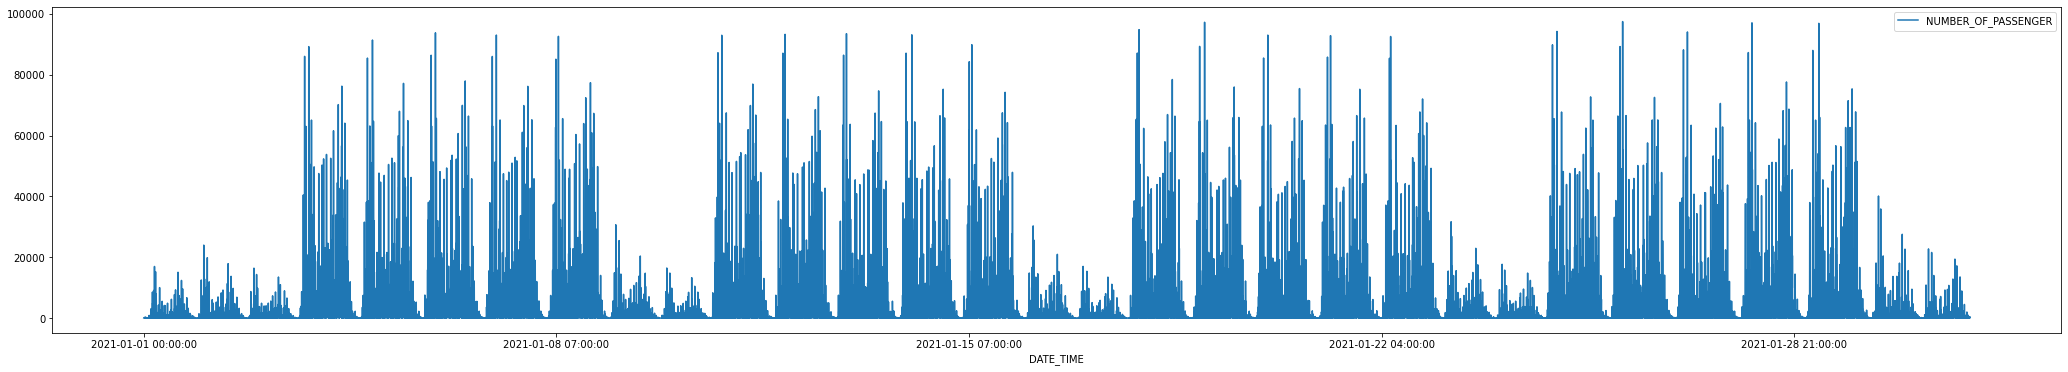

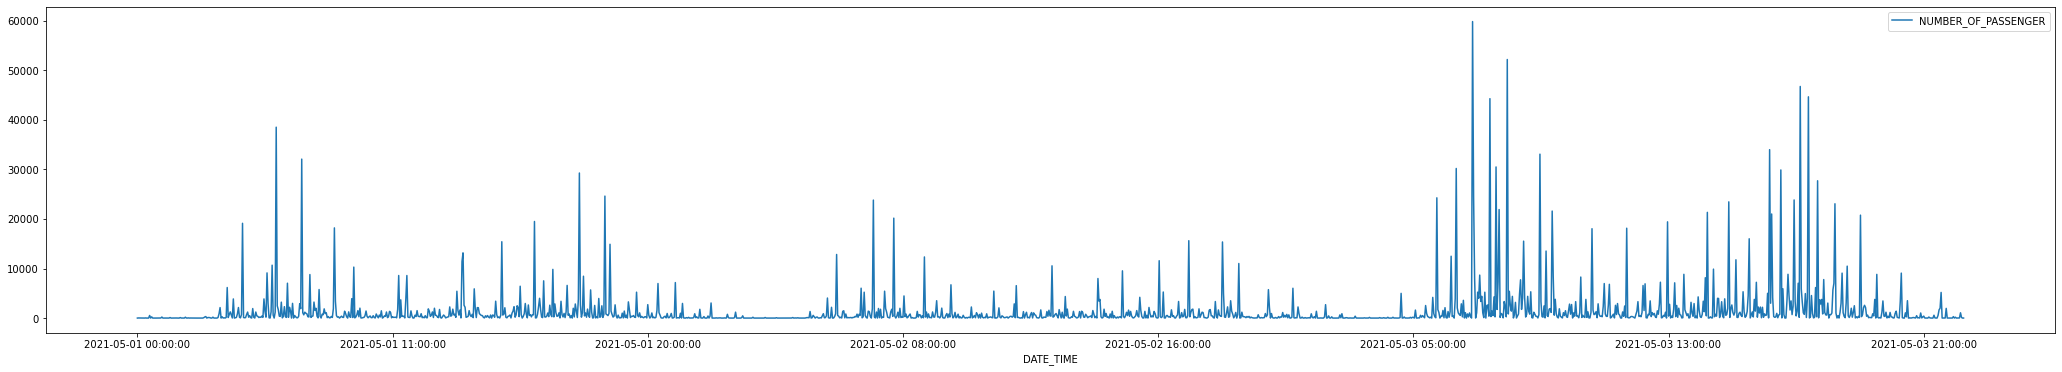

# function for null check, sort value by column

In [17]:
def  Nanvalues(data_mon):
    mon_null = data_mon.isnull().sum()
    return mon_null


In [37]:
def sort_value(data_month,name):
    return data_month.sort_values(name,ascending=False)



# creating data frame for total passengers of different transportation types

In [21]:
data_jan_transport_sum = data_jan.groupby(["TRANSPORT_TYPE_DESC"])["NUMBER_OF_PASSENGER"].sum() # january 2021
df_1 = pd.DataFrame(data_jan_transport_sum)
df_1["Percent"] = (df_1["NUMBER_OF_PASSENGER"] / df_1["NUMBER_OF_PASSENGER"].sum()*100)
df_1




,NUMBER_OF_PASSENGER,Percent
TRANSPORT_TYPE_DESC,,
DENİZ,1763773,2.372241
KARAYOLU,44635332,60.033680
RAY,27951380,37.594079


In [114]:
data_jan_transport_sum = data_jan.groupby(["DATE_TIME","TRANSPORT_TYPE_DESC"],group_keys=False)["NUMBER_OF_PASSENGER"].sum()
df_1 = pd.DataFrame(data_jan_transport_sum)
df_1




NUMBER_OF_PASSENGER
DATE_TIME           TRANSPORT_TYPE_DESC                     
2021-01-01 00:00:00 KARAYOLU                             583
                    RAY                                  247
2021-01-01 01:00:00 DENİZ                                  1
                    KARAYOLU                             182
                    RAY                                    8
...                                                      ...
2021-01-31 22:00:00 KARAYOLU                            3798
                    RAY                                 4354
2021-01-31 23:00:00 DENİZ                                 29
                    KARAYOLU                            1573
                    RAY                                 2433

[2210 rows x 1 columns]

In [26]:
data_may_transport_sum = data_may.groupby(["TRANSPORT_TYPE_DESC"])["NUMBER_OF_PASSENGER"].sum() # may 2021
df_1 = pd.DataFrame(data_may_transport_sum)
df_1["percent"] = (df_1["NUMBER_OF_PASSENGER"] / df_1["NUMBER_OF_PASSENGER"].sum()*100)
df_1


,NUMBER_OF_PASSENGER,percent
TRANSPORT_TYPE_DESC,,
DENİZ,47448,1.793874
KARAYOLU,1823757,68.951063
RAY,773797,29.255063


In [46]:
data_may_transport_sum = data_may.groupby(["DATE_TIME","TRANSPORT_TYPE_DESC"])["NUMBER_OF_PASSENGER"].sum()
df_1 = pd.DataFrame(data_may_transport_sum)
df_1



NUMBER_OF_PASSENGER
DATE_TIME           TRANSPORT_TYPE_DESC                     
2021-05-01 00:00:00 DENİZ                                  4
                    KARAYOLU                             814
                    RAY                                   44
2021-05-01 01:00:00 DENİZ                                  1
                    KARAYOLU                             231
...                                                      ...
2021-05-03 22:00:00 KARAYOLU                            9612
                    RAY                                  599
2021-05-03 23:00:00 DENİZ                                 31
                    KARAYOLU                            3522
                    RAY                                  171

[216 rows x 1 columns]

In [27]:
data_jun = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv")
data_jun  # 2020 june dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-06-07 08:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,1829,1925
1,2020-06-07 22:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,2669,3110
2,2020-06-23 05:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,14,14
3,2020-06-28 11:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,51,51
4,2020-06-26 18:00:00,2,RAY,MARMARAY,2,NORMAL,19160,19794
...,...,...,...,...,...,...,...,...
19829,2020-06-24 13:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,62,63
19830,2020-06-22 08:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,AKTARMA,138,138
19831,2020-06-12 10:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,3430,3529
19832,2020-06-29 12:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,103,106


In [28]:
data_sep = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv")
data_sep # 2020 september dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-09-15 09:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,909,910
1,2020-09-16 09:00:00,2,RAY,TELEFERİK MAÇKA - TAŞKIŞLA,2,NORMAL,12,15
2,2020-09-15 12:00:00,2,RAY,KADIKÖY-MODA,2,NORMAL,84,88
3,2020-09-06 13:00:00,1,KARAYOLU,ÖHO,2,NORMAL,60045,69100
4,2020-09-26 13:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,3348,3379
...,...,...,...,...,...,...,...,...
22184,2020-09-28 12:00:00,3,DENİZ,ŞEHİR HATLARI,2,AKTARMA,1146,1147
22185,2020-09-29 23:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,17,17
22186,2020-09-08 13:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,130,131
22187,2020-09-20 23:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,22,22


In [34]:

dateSort(data_sep)
dateSort(data_jun)  


In [100]:
def groupTransfertypes(data_month):
    data_month_transport_sum = data_month.groupby(["DATE_TIME","TRANSFER_TYPE"])["NUMBER_OF_PASSENGER"].sum() # january 2021
    return  pd.DataFrame(data_month_transport_sum)

In [57]:
groupTransfertypes(data_jun)

NUMBER_OF_PASSENGER
DATE_TIME           TRANSFER_TYPE                     
2020-06-01 00:00:00 NORMAL                        1025
2020-06-01 01:00:00 NORMAL                         306
2020-06-01 02:00:00 NORMAL                         145
2020-06-01 03:00:00 NORMAL                          97
2020-06-01 04:00:00 NORMAL                         334
...                                                ...
2020-06-30 21:00:00 NORMAL                       97971
2020-06-30 22:00:00 AKTARMA                      11819
                    NORMAL                       70535
2020-06-30 23:00:00 AKTARMA                       5696
                    NORMAL                       34176

[1356 rows x 1 columns]

In [58]:
groupTransfertypes(data_sep)

NUMBER_OF_PASSENGER
DATE_TIME           TRANSFER_TYPE                     
2020-09-01 00:00:00 AKTARMA                        566
                    NORMAL                        7198
2020-09-01 01:00:00 AKTARMA                          9
                    NORMAL                        1906
2020-09-01 02:00:00 NORMAL                         960
...                                                ...
2020-09-30 21:00:00 NORMAL                      104426
2020-09-30 22:00:00 AKTARMA                      10946
                    NORMAL                       82908
2020-09-30 23:00:00 AKTARMA                       5777
                    NORMAL                       40489

[1378 rows x 1 columns]

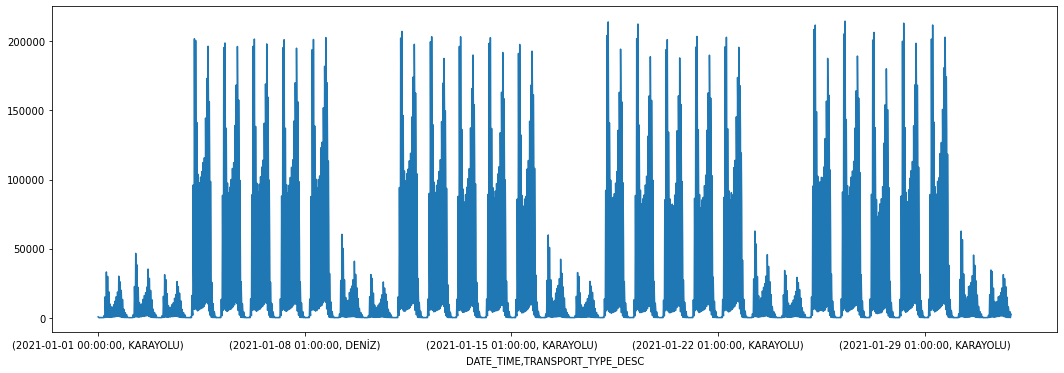

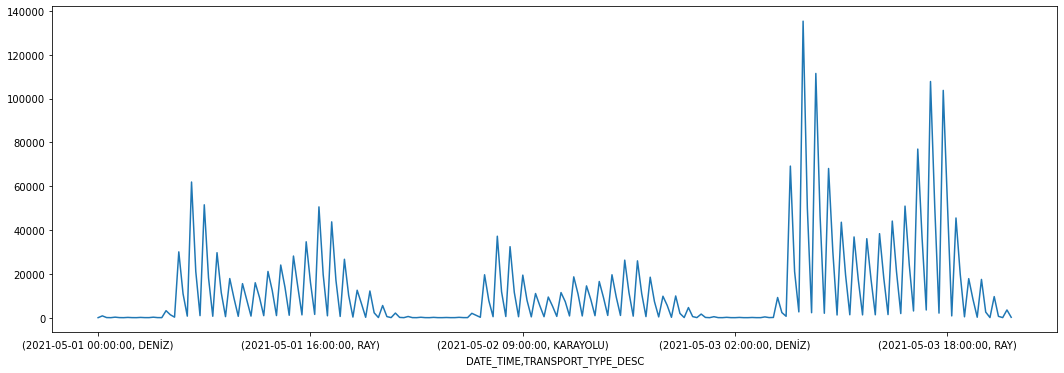

In [115]:
from sqlalchemy import column


data_jan_transport_sum.plot(x="DATE_TIME", column="TRANSPORT_TYPE_DESC",figsize=(18,6))
plt.show()
data_may_transport_sum.plot(x="DATE_TIME", y = ["NUMBER_OF_PASSENGER"],figsize=(18,6))
plt.show()



In [ ]:
data_jan_transport_sum

## Question #2

For this question use the data [at this link](https://alaska.usgs.gov/products/data.php?dataid=522). This dataset contains isotope values of muscle tissue from fish collected in the nearshore Beaufort Sea, Alaska in summers 2017-2019.

1. Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.
2. Can you statistically observe any differences in lengths between the years 2018 and 2019?
3. Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.
4. Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?
5. Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?

In [77]:
import seaborn as sns

c:\Users\ozden\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
